In [25]:
## explore the OSMnx package

# pip install contextily

import osmnx as ox
import folium
import contextily as cx
import matplotlib.pyplot as plt

In [26]:
# This is using the Nominatim API to find the place by name and geocode it.
# Nominatim is the search engine that powers the search bar on openstreetmap.org.

PLACE_NAME = 'Charlottenburg, Charlottenburg-Wilmersdorf, Berlin, Germany'

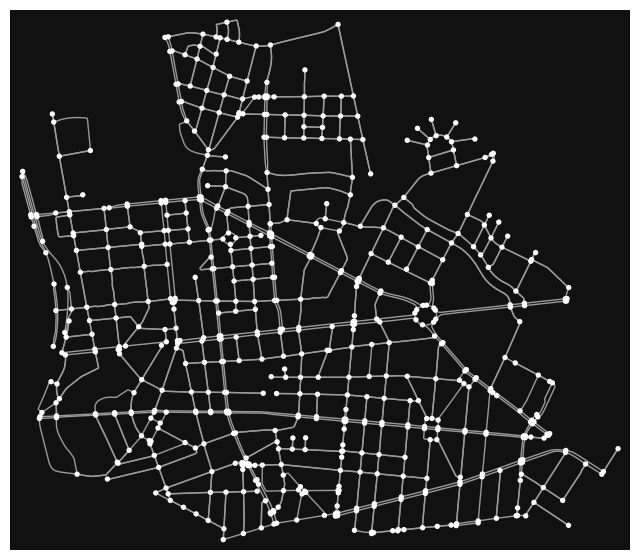

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [27]:
## Show Charlottenburg road network

G = ox.graph_from_place(PLACE_NAME, network_type='drive')
ox.plot_graph(G) 

In [21]:

pingpong = "\"elements\":[{\"type\": \"node\", \"id\": 3690386818, \"lat\": 46.9418135, \"lon\": 7.4350152, \"tags\": {\"leisure\": \"pitch\", \"sport\": \"table_tennis\"}}, {\"type\": \"node\", \"id\": 6835150496, \"lat\": 52.5226885, \"lon\": 13.3979877, \"tags\": {\"leisure\": \"pitch\", \"sport\": \"table_tennis\", \"wheelchair\": \"yes\"}}, {\"type\": \"node\", \"id\": 6835150497, \"lat\": 52.5227083, \"lon\": 13.3978939, \"tags\": {\"leisure\": \"pitch\", \"sport\": \"table_tennis\", \"wheelchair\": \"yes\"}}, {\"type\": \"node\", \"id\": 6835150598, \"lat\": 52.5229822, \"lon\": 13.3965893, \"tags\": {\"access\": \"customers\", \"leisure\": \"pitch\", \"sport\": \"table_tennis\"}}, {\"type\": \"node\", \"id\": 6835150599, \"lat\": 52.5229863, \"lon\": 13.3964894, \"tags\": {\"access\": \"customers\", \"leisure\": \"pitch\", \"sport\": \"table_tennis\"}}]"
toilets = "\"elements\":[{\"type\": \"node\", \"id\": 10811509225, \"lat\": 46.9422137, \"lon\": 7.4341902, \"tags\": {\"amenity\": \"toilets\"}}]"

import json
import numpy as np
from scipy.spatial import KDTree

def nearest_nodes(json1, json2, type1="node", type2="node"):
    # Parse the JSON strings into Python data structures
    data1 = json.loads(json1)["elements"]
    data2 = json.loads(json2)["elements"]

    # Extract the nodes (which are dictionaries) from the data
    nodes1 = [element for element in data1 if element['type'] == type1]
    nodes2 = [element for element in data2 if element['type'] == type2]

    # Convert lat/lon to numpy arrays
    coords1 = np.array([(node['lat'], node['lon']) for node in nodes1])
    coords2 = np.array([(node['lat'], node['lon']) for node in nodes2])

    # Build KDTree
    tree = KDTree(coords2)

    nearest_nodes = {}
    for i, coord in enumerate(coords1):
        dist, idx = tree.query(coord)
        nearest_node = nodes2[idx]
        nearest_nodes[nodes1[i]['id']] = nearest_node['id']

    return nearest_nodes


def get_element_from_overpass_response(response_json, element_id):
    # Parse the JSON string into a Python data structure
    response_data = json.loads(response_json)

    # Extract the elements (which are dictionaries) from the data
    elements = response_data['elements']

    # Find the element with the matching id
    for element in elements:
        if element['id'] == element_id:
            return element

    # If no element with the matching id is found, return None
    return None

nearest_nodes = nearest_nodes(pingpong, toilets)

pingpongs = [get_element_from_overpass_response(pingpong, int(id)) for id in nearest_nodes.keys()]
pingpongs

TypeError: list indices must be integers or slices, not str

In [29]:
ox.graph_to_gdfs(G, nodes=False).explore()

In [30]:
## plot the bike network on a basemap

# G = ox.graph_from_place(PLACE_NAME, network_type='bike')
# type(G)
# ox.plot_graph_folium(G)

In [31]:
## create edge and node dataframes from road graph object
area,edges = ox.graph_to_gdfs(G)
area.head(2)

y          x  ref            highway  street_count  \
osmid                                                                
458330  52.511557  13.286217    7  motorway_junction             3   
458334  52.514265  13.286467  NaN                NaN             3   

                         geometry  
osmid                              
458330  POINT (13.28622 52.51156)  
458334  POINT (13.28647 52.51426)

In [32]:
edges.head(2)

osmid  oneway lanes        highway maxspeed reversed  \
u      v        key                                                             
458330 26708458 0      4434508    True     2  motorway_link       50    False   
       458334   0    227985278    True     3       motorway       60    False   

                      length  \
u      v        key            
458330 26708458 0    166.618   
       458334   0    302.682   

                                                              geometry    ref  \
u      v        key                                                             
458330 26708458 0    LINESTRING (13.28622 52.51156, 13.28640 52.511...    NaN   
       458334   0    LINESTRING (13.28622 52.51156, 13.28637 52.512...  A 100   

                    bridge name width junction access tunnel  
u      v        key                                           
458330 26708458 0      NaN  NaN   NaN      NaN    NaN    NaN  
       458334   0      NaN  NaN   NaN      NaN    NaN    NaN

In [33]:
area.explore()

In [60]:
## extract benches from the area
from shapely.geometry import Polygon, Point, LineString
benches = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'bench'})
print(type(benches))
for index, row in benches.iterrows():
    # print(row)
    print(isinstance(row.geometry, Point))
    x, y = (list(row['geometry'].coords)[0])
    print(x)

<class 'geopandas.geodataframe.GeoDataFrame'>
True
13.2955896
True
13.2962954
True
13.3248125
True
13.3255576
True
13.2926206
True
13.2926002
True
13.2926303
True
13.3251214
True
13.3251654
True
13.2966017
True
13.2969878
True
13.2969437
True
13.2967879
True
13.2993076
True
13.2992069
True
13.2984171
True
13.316638
True
13.3166756
True
13.2963335
True
13.2963875
True
13.3208017
True
13.3200344
True
13.2978024
True
13.2981081
True
13.2977901
True
13.2980961
True
13.2977689
True
13.2980742
True
13.2977564
True
13.2980628
True
13.2946421
True
13.2946305
True
13.2946212
True
13.2945696
True
13.2945222
True
13.296537
True
13.2944603
True
13.296475
True
13.2944002
True
13.2964186
True
13.29434
True
13.2963621
True
13.2942872
True
13.2963129
True
13.2933489
True
13.2935065
True
13.2932547
True
13.2935779
True
13.2933341
True
13.2934943
True
13.2931324
True
13.2935572
True
13.2930552
True
13.2935011
True
13.2930582
True
13.2932923
True
13.2930001
True
13.2933321
True
13.293046
True
13.2923367


NotImplementedError: Component rings have coordinate sequences, but the polygon does not

In [ ]:
type(benches)

geopandas.geodataframe.GeoDataFrame

In [12]:
## extract parks from the area

parks = ox.geometries_from_place(PLACE_NAME, tags={'leisure':'park'})
parks.head();
# parks

In [13]:
## extract water fountains from the area

water_fountains = ox.geometries_from_place(PLACE_NAME, tags={'amenity':'drinking_water'})
water_fountains.head();


In [14]:
## extract fuel stations from the area

fuel_stations = ox.geometries_from_place(PLACE_NAME, {"amenity": "fuel"})
fuel_stations.head();

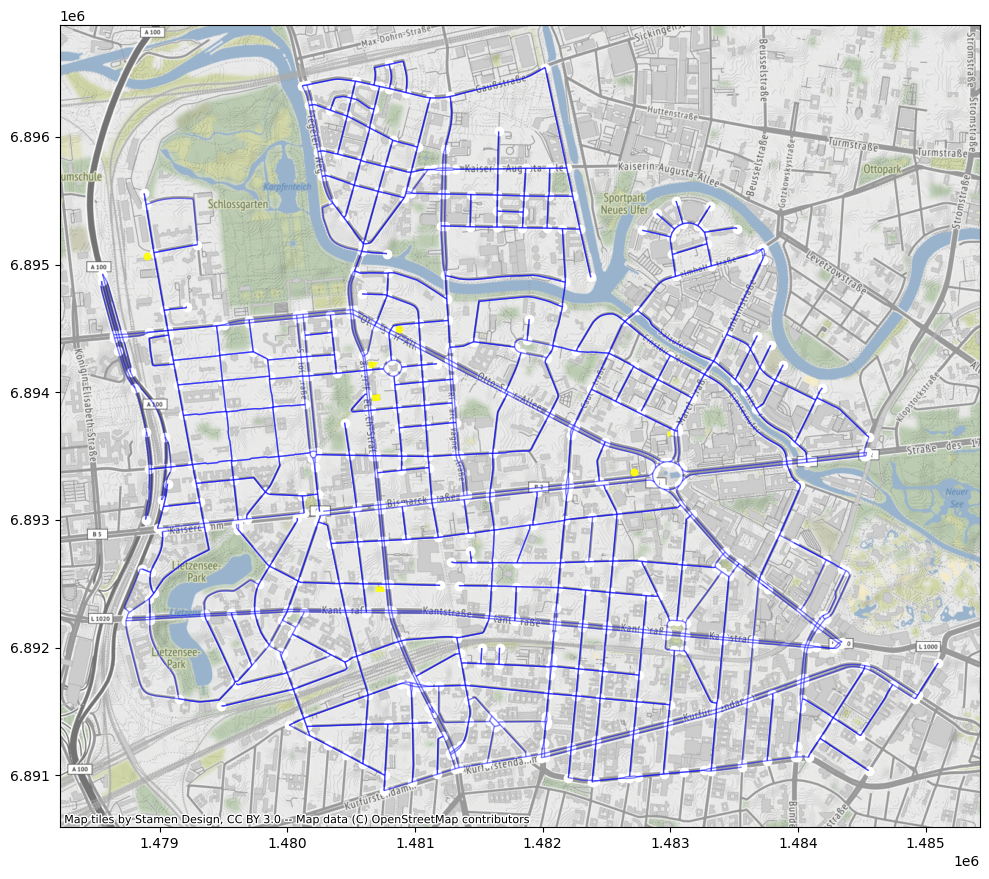

In [15]:
## show all the fuel stations on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
fuel_stations_crs = fuel_stations.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
fuel_stations_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())

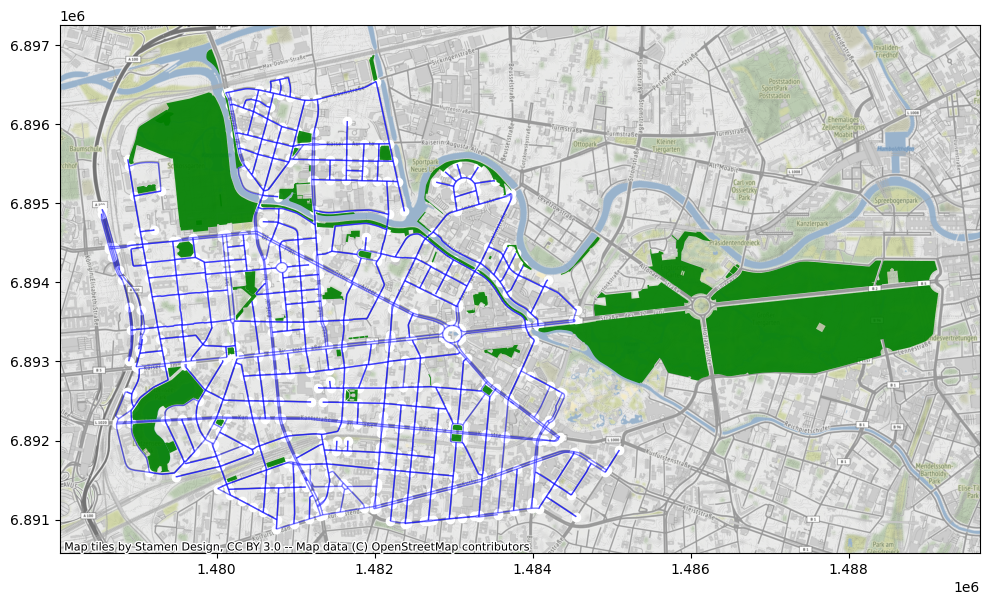

In [24]:
## show all the parks on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
parks_crs = parks.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
parks_crs.plot(ax=ax, color='green', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())

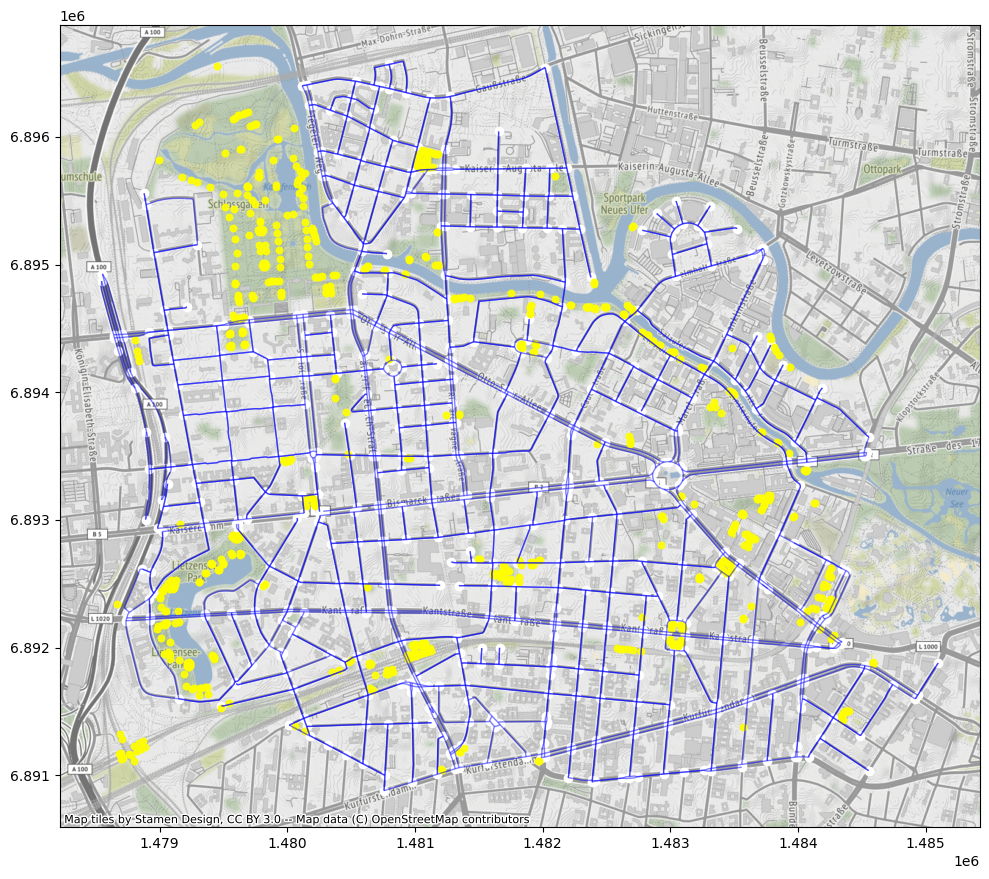

In [17]:
## show the benches on the map

area_crs = area.to_crs('3857')
edges_crs = edges.to_crs('3857')
benches_crs = benches.to_crs('3857')

fig, ax = plt.subplots(figsize=(10, 14))
area_crs.plot(ax=ax, facecolor='white')
edges_crs.plot(ax=ax, linewidth=1, edgecolor='blue', alpha=0.5)
benches_crs.plot(ax=ax, color='yellow', alpha=0.9, markersize=22)
plt.tight_layout()
cx.add_basemap(ax,crs=area_crs.crs.to_string())



In [18]:
## geocode_to_gdf allows you to use nominatim api to geocode a place name.
## https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geocoder.geocode_to_gdf

origin = (
    ox.geocode_to_gdf("zoologischer garten")
    .to_crs(edges.crs)  
    .at[0, "geometry"]  
    .centroid  
)

destination = (
    ox.geocode_to_gdf("Charlottenburg, Berlin, Germany")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid 
)

origin_node_id = ox.nearest_nodes(G, origin.x, origin.y)
destination_node_id = ox.nearest_nodes(G, destination.x, destination.y)

In [19]:
route = ox.shortest_path(G, origin_node_id, destination_node_id)
route;

In [20]:
## create a route passes all the water fountains
route = ox.shortest_path(G, origin_node_id, destination_node_id, weight="length")
route;

In [21]:
ox.plot_route_folium(G, route, route_linewidth=6, node_size=0)
# ox.plot_route_folium(G, extended_route, route_linewidth=6, node_size=0)

/tmp/ipykernel_11321/2620764708.py:1: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx usage example repo for complete details and demonstrations.
  ox.plot_route_folium(G, route, route_linewidth=6, node_size=0)


In [23]:
# pip install overpy

## running a single query without osmnx
## use overpy to extract all the benches in a grid located around DSR

import overpy
api = overpy.Overpass()
result = api.query("""
            [out:json];
                node["amenity"="bench"](52.495,13.32,52.51,13.35);
            out body;
            >;
            out skel qt;
            """)

len(result.nodes)

222